<a href="https://colab.research.google.com/github/GabrielaSchmitt/Data-Science-studies/blob/main/PCA_e_%C3%81rvores_de_decis%C3%A3o_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from tqdm import tqdm

In [5]:
acuracias = {}
resultados = {}
variances = {}

for c in tqdm(range(1, 30)):
  pca = PCA(n_components=c)
  Xpca = pca.fit_transform(X)
  variances[c] = sum(pca.explained_variance_ratio_)
  X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3, random_state=1234)
  clf = DecisionTreeClassifier(max_depth=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  resultados[c] = y_pred
  accuracy = metrics.accuracy_score(y_test, y_pred)
  acuracias[c] = accuracy * 100

100%|██████████| 29/29 [00:02<00:00,  9.84it/s]


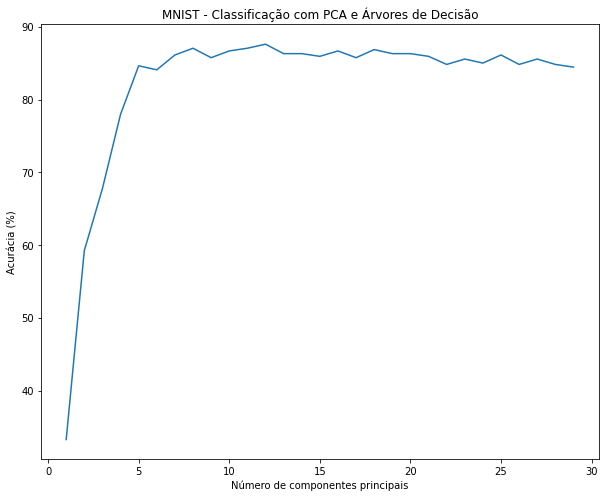

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(list(acuracias.keys()), list(acuracias.values()))
plt.title('MNIST - Classificação com PCA e Árvores de Decisão')
plt.xlabel('Número de componentes principais')
plt.ylabel('Acurácia (%)')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, resultados[11])

array([[45,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 51,  0,  1,  0,  0,  1,  0,  3,  0],
       [ 0,  1, 48,  2,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  1,  3],
       [ 1,  1,  0,  0, 61,  0,  2,  1,  0,  0],
       [ 1,  0,  0,  4,  1, 52,  0,  0,  2,  1],
       [ 1,  1,  0,  0,  0,  0, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 39,  9,  0],
       [ 0,  5,  2,  0,  0,  0,  0,  0, 38,  2],
       [ 1,  1,  1,  2,  1,  2,  0,  1,  7, 35]])

In [8]:
accuracy_score(y_test, resultados[11])

0.8703703703703703

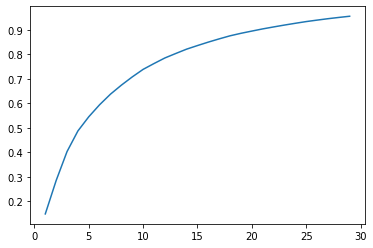

In [9]:
plt.plot(list(variances.keys()), list(variances.values()))